In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/EV-Project/data/raw_ev_data.csv')
df.head(5)

,X,Y,Transaction_ID,Session_ID,Session_start_date,Session_end_date,Connect_Start_Date,Connect_Start_Time,F24_Hour_Start_Time_Format,Connect_End_Date,Connect_End_Time,F24_Hour_Connect_End_Time,Charging_Time,Province_or_state,Owner,Site,Address,POINT_X,POINT_Y,Station,Card_number,ObjectId,End_Reason,Total_kWh,ObjectId2
0,-75.7475,45.39468,8971546,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,05/01/22 11:36,05/01/22 12:10,05/01/22,11:36:44,11:36:44,05/01/22,12:10:32,12:10:32,0:33:48,ON,City of Ottawa,City of Ottawa - 190 Richmond Road,190 Richmond Rd.,-75.7475,45.39466,AAA-14533,1.10E+12,NaN,Charging ended by vehicle,4.06440,1
1,-75.6823,45.43930,8971910,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,05/01/22 12:07,05/01/22 12:57,05/01/22,12:07:03,12:07:03,05/01/22,12:57:10,12:57:10,0:50:07,ON,City of Ottawa,City of Ottawa - 245 Crichton St.,245 Crichton St.,-75.6823,45.43930,AAA-14506,1.10E+12,NaN,The charging cable was disconnected and put ba...,2.92454,2
2,-75.6782,45.08860,8972766,5e4d5163-2c67-4049-ac1d-41193e6064d9,05/01/22 11:43,05/01/22 14:40,05/01/22,11:43:33,11:43:33,05/01/22,2:40:34,14:40:34,2:57:01,ON,City of Ottawa,City of Ottawa - 186 Main St.,186 Main St.,-75.6782,45.40886,AAA-14503,RC01086626836246,NaN,Charging ended by vehicle,20.59820,3
3,-75.6793,45.42710,8972887,c83802a2-1f6d-4c24-bba2-5bff14371aec,05/01/22 13:21,05/01/22 14:57,05/01/22,1:21:37,13:21:37,05/01/22,2:57:49,14:57:49,1:36:12,ON,City of Ottawa,City of Ottawa - 301 Laurier Avenue,301 Laurier Ave. E,-75.6793,45.42710,AAA-14508,MA01090921821958,NaN,The charging cable was disconnected and put ba...,11.52725,4
4,-75.6893,45.40323,8973165,24715a5e-ccee-420f-ac17-0414a5ec14aa,05/01/22 15:00,05/01/22 15:35,05/01/22,3:00:19,15:00:19,05/01/22,3:35:18,15:35:18,0:34:59,ON,City of Ottawa,City of Ottawa - 2nd Avenue Parking Garage,170 Second Ave.,-75.6893,45.40323,AAB-20483,RC01086626807904,NaN,The charging cable was disconnected and put ba...,3.17881,5


In [3]:
df.shape

(22455, 25)

In [4]:
df.iloc[[1128, 1729]]

,X,Y,Transaction_ID,Session_ID,Session_start_date,Session_end_date,Connect_Start_Date,Connect_Start_Time,F24_Hour_Start_Time_Format,Connect_End_Date,Connect_End_Time,F24_Hour_Connect_End_Time,Charging_Time,Province_or_state,Owner,Site,Address,POINT_X,POINT_Y,Station,Card_number,ObjectId,End_Reason,Total_kWh,ObjectId2
1128,-75.6793,45.42710,9566850,5b4da7f9-f75a-4321-b679-c16ac3424253,6/30/2022 11:25:13 PM,07/01/22 1:41,6/30/2022,11:25:13,23:25:13,06/01/22,1:41:20,1:41:20,2:16:07,ON,City of Ottawa,City of Ottawa - 301 Laurier Avenue,301 Laurier Ave. E,-75.6793,45.42710,AAA-14507,MA01090921770736,NaN,The charging cable was disconnected and put ba...,16.35400,1129
1729,-75.7212,45.40702,9269338,0396683f-300a-4c5e-b93d-d5094f22202a,5/31/2022 5:49:20 PM,06/01/22 11:47,5/31/2022,5:49:20,17:49:20,05/01/22,11:47:29,11:47:29,17:58:09,ON,City of Ottawa,City of Ottawa - 930 Wellington Street,930 Wellington St.,-75.7212,45.40702,AAA-14498,MA01090921761207,NaN,Charging ended by vehicle,50.84373,1730


In [5]:
rename_map = {
    'X': 'longitude',
    'Y': 'latitude',
    'Transaction_ID': 'transaction_id',
    'Session_ID': 'session_id',
    'Session_start_date': 'session_start',
    'Session_end_date': 'session_end',
    'Connect_Start_Date': 'connect_start_date',
    'Connect_Start_Time': 'connect_start_time',
    'F24_Hour_Start_Time_Format': 'connection_start',
    'Connect_End_Date': 'connect_end_date',
    'Connect_End_Time': 'connect_end_time',
    'F24_Hour_Connect_End_Time': 'connection_end',
    'Charging_Time': 'charging_duration',
    'Province_or_state': 'province',
    'Owner': 'owner',
    'Site': 'site_name',
    'Address': 'address',
    'POINT_X': 'point_x',
    'POINT_Y': 'point_y',
    'Station': 'station_id',
    'Card_number': 'card_number',
    'End_Reason': 'end_reason',
    'Total_kWh': 'total_kwh',
    'ObjectId': 'object_id',
    'ObjectId2': 'object_id2'
}

df.rename(columns=rename_map, inplace=True)

df = df[['longitude', 'latitude', 'session_id','connect_start_date', 'connection_start',
         'connect_end_date', 'connection_end','charging_duration', 'province', 'owner', 
         'address', 'station_id','end_reason', 'total_kwh']]

df

,longitude,latitude,session_id,connect_start_date,connection_start,connect_end_date,connection_end,charging_duration,province,owner,address,station_id,end_reason,total_kwh
0,-75.7475,45.39468,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,05/01/22,11:36:44,05/01/22,12:10:32,0:33:48,ON,City of Ottawa,190 Richmond Rd.,AAA-14533,Charging ended by vehicle,4.06440
1,-75.6823,45.43930,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,05/01/22,12:07:03,05/01/22,12:57:10,0:50:07,ON,City of Ottawa,245 Crichton St.,AAA-14506,The charging cable was disconnected and put ba...,2.92454
2,-75.6782,45.08860,5e4d5163-2c67-4049-ac1d-41193e6064d9,05/01/22,11:43:33,05/01/22,14:40:34,2:57:01,ON,City of Ottawa,186 Main St.,AAA-14503,Charging ended by vehicle,20.59820
3,-75.6793,45.42710,c83802a2-1f6d-4c24-bba2-5bff14371aec,05/01/22,13:21:37,05/01/22,14:57:49,1:36:12,ON,City of Ottawa,301 Laurier Ave. E,AAA-14508,The charging cable was disconnected and put ba...,11.52725
4,-75.6893,45.40323,24715a5e-ccee-420f-ac17-0414a5ec14aa,05/01/22,15:00:19,05/01/22,15:35:18,0:34:59,ON,City of Ottawa,170 Second Ave.,AAB-20483,The charging cable was disconnected and put ba...,3.17881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22450,-75.6623,45.40838,b68ff4eb-f956-419f-93e1-823b04de0b76,6/23/2024,21:38:59,6/24/2024,6:43:53,9:04:54,ON,City of Ottawa,1551 Lycee Place,AAA-14510,Charging ended by vehicle,36.09781
22451,-75.7136,45.41067,cb4c229b-458c-40a1-91f2-d1164c4c3963,6/23/2024,21:15:54,6/24/2024,7:57:41,10:41:47,ON,City of Ottawa,170 Primrose Ave.,AAA-14502,Charging ended by vehicle,61.54947
22452,-75.7136,45.41067,3d0ab93b-2376-4a25-8a37-732b9e0bb7f3,6/24/2024,8:14:15,6/24/2024,8:14:44,0:00:29,ON,City of Ottawa,6 Oak St.,AAA-14521,Charging ended by vehicle,0.00353
22453,-75.6782,45.08860,4ff71670-9a49-4ada-bcb7-204ab25f1b14,6/23/2024,22:05:14,6/24/2024,8:42:31,10:37:17,ON,City of Ottawa,186 Main St.,AAA-14505,The charging cable was disconnected and put ba...,74.45688


In [6]:
df['connect_start'] = pd.to_datetime(
    df['connect_start_date'] + ' ' + df['connection_start'],
    errors='coerce'
)

df['connect_end'] = pd.to_datetime(
    df['connect_end_date'] + ' ' + df['connection_end'],
    errors='coerce'
)

df.drop(['connect_start_date','connection_start','connect_end_date','connection_end'], axis=1, inplace=True)

/var/folders/gb/k6dlrgjj1sj86p2sks70tns00000gn/T/ipykernel_33900/3173124239.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['connect_start'] = pd.to_datetime(
/var/folders/gb/k6dlrgjj1sj86p2sks70tns00000gn/T/ipykernel_33900/3173124239.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['connect_end'] = pd.to_datetime(


In [7]:
df['charging_duration'] = pd.to_timedelta(df['charging_duration'], errors='coerce')

df['charging_duration_minutes'] = (df['charging_duration'].dt.total_seconds() / 60).round(2)

In [8]:
df.drop(columns='charging_duration', inplace=True)

In [9]:
df.head()

,longitude,latitude,session_id,province,owner,address,station_id,end_reason,total_kwh,connect_start,connect_end,charging_duration_minutes
0,-75.7475,45.39468,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,ON,City of Ottawa,190 Richmond Rd.,AAA-14533,Charging ended by vehicle,4.06440,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80
1,-75.6823,45.43930,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,ON,City of Ottawa,245 Crichton St.,AAA-14506,The charging cable was disconnected and put ba...,2.92454,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12
2,-75.6782,45.08860,5e4d5163-2c67-4049-ac1d-41193e6064d9,ON,City of Ottawa,186 Main St.,AAA-14503,Charging ended by vehicle,20.59820,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02
3,-75.6793,45.42710,c83802a2-1f6d-4c24-bba2-5bff14371aec,ON,City of Ottawa,301 Laurier Ave. E,AAA-14508,The charging cable was disconnected and put ba...,11.52725,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20
4,-75.6893,45.40323,24715a5e-ccee-420f-ac17-0414a5ec14aa,ON,City of Ottawa,170 Second Ave.,AAB-20483,The charging cable was disconnected and put ba...,3.17881,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98


In [10]:
new_order = [
    'longitude', 'latitude', 'session_id', 'connect_start', 'connect_end',
    'charging_duration_minutes', 'province', 'owner', 'address',
    'station_id', 'end_reason', 'total_kwh'
]

df = df[new_order]

df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh
0,-75.7475,45.39468,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 Richmond Rd.,AAA-14533,Charging ended by vehicle,4.06440
1,-75.6823,45.43930,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 Crichton St.,AAA-14506,The charging cable was disconnected and put ba...,2.92454
2,-75.6782,45.08860,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 Main St.,AAA-14503,Charging ended by vehicle,20.59820
3,-75.6793,45.42710,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 Laurier Ave. E,AAA-14508,The charging cable was disconnected and put ba...,11.52725
4,-75.6893,45.40323,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 Second Ave.,AAB-20483,The charging cable was disconnected and put ba...,3.17881


In [11]:
# sanity check - charging_duration and total_kwh should not have any negative values

negative_durations = df.loc[df['charging_duration_minutes'] < 0]
print(f"Number of negative charging durations: {len(negative_durations)}")

total_kwh = df.loc[df['total_kwh'] < 0]
print(f"Number of negative power consumed: {len(negative_durations)}")



Number of negative charging durations: 0
Number of negative power consumed: 0


In [12]:
df.describe()

,longitude,latitude,connect_start,connect_end,charging_duration_minutes,total_kwh
count,22455.000000,22455.000000,22455,22455,22455.000000,22455.000000
mean,-75.682781,45.395921,2023-07-23 19:38:42.356312576,2023-07-23 20:46:37.997506304,171.109725,15.573271
min,-75.747500,45.088600,2021-12-31 18:21:10,2021-12-31 19:06:57,0.000000,0.000000
25%,-75.690300,45.407020,2023-01-13 03:05:21,2023-01-13 03:40:09.500000,62.020000,4.870825
50%,-75.686400,45.416010,2023-09-02 12:39:16,2023-09-02 14:56:14,119.820000,10.276760
75%,-75.679300,45.427100,2024-02-11 07:59:00,2024-02-11 08:20:32,218.390000,21.649070
max,-75.488000,45.441660,2024-06-30 22:05:45,2024-06-30 23:02:29,1392.120000,121.781100
std,0.047111,0.084467,NaN,NaN,169.469285,15.165360


In [13]:
# checking for missing values

col_list = list(df.columns)

types = [df[col].dtype for col in col_list]
missing_data = df.isnull().sum().values
missing_data_percentage = round(100 * df.isnull().sum() / len(df), 2).values
n_unique_values = df.nunique().values

variables_df = pd.DataFrame({'Type': types,
                             'N_missing_data': missing_data,
                             '%_missing_data': missing_data_percentage,
                             'N_unique_values': n_unique_values},
                            index=col_list)
variables_df.index.name = 'Features'
variables_df

,Type,N_missing_data,%_missing_data,N_unique_values
Features,,,,
longitude,float64,0,0.0,17
latitude,float64,0,0.0,17
session_id,object,0,0.0,22455
connect_start,datetime64[ns],0,0.0,22446
connect_end,datetime64[ns],0,0.0,22451
charging_duration_minutes,float64,0,0.0,14127
province,object,0,0.0,1
owner,object,0,0.0,1
address,object,0,0.0,19


In [14]:
# checking for duplicate data

col_list = list(df.columns)

types = [df[col].dtype for col in col_list]
duplicated_data = df.duplicated().sum()
duplicated_data_percentage = round(100 * df.duplicated().sum() / len(df), 2)
n_unique_values = df.nunique().values

variables_df = pd.DataFrame({'Type': types,
                             'N_duplicated_data': duplicated_data,
                             '%_duplicated_data': duplicated_data_percentage,
                             'N_unique_values': n_unique_values},
                            index=col_list)
variables_df.index.name = 'Features'
variables_df

,Type,N_duplicated_data,%_duplicated_data,N_unique_values
Features,,,,
longitude,float64,0,0.0,17
latitude,float64,0,0.0,17
session_id,object,0,0.0,22455
connect_start,datetime64[ns],0,0.0,22446
connect_end,datetime64[ns],0,0.0,22451
charging_duration_minutes,float64,0,0.0,14127
province,object,0,0.0,1
owner,object,0,0.0,1
address,object,0,0.0,19


In [15]:
# sanity check - dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22455 entries, 0 to 22454
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   longitude                  22455 non-null  float64       
 1   latitude                   22455 non-null  float64       
 2   session_id                 22455 non-null  object        
 3   connect_start              22455 non-null  datetime64[ns]
 4   connect_end                22455 non-null  datetime64[ns]
 5   charging_duration_minutes  22455 non-null  float64       
 6   province                   22455 non-null  object        
 7   owner                      22455 non-null  object        
 8   address                    22455 non-null  object        
 9   station_id                 22455 non-null  object        
 10  end_reason                 22455 non-null  object        
 11  total_kwh                  22455 non-null  float64       
dtypes: d

In [16]:
# sanity check - latitude and longitude ranges

incorrect_coords = df[(df['latitude']< -90) | (df['latitude']> 90) | (df['longitude']< -180) | (df['longitude']> 180)]

print(f"Number of rows with invalid coordinates: {len(incorrect_coords)}")

Number of rows with invalid coordinates: 0


In [17]:
# sanity check
df['session_id'].duplicated().sum()

np.int64(0)

In [18]:
# Handling Address Column To Avoid Any Further Inconsistenceis

df['address'] = df['address'].astype(str).str.strip().str.lower()

In [19]:
# sanity check - invalid times where end time is less than start time

df[df['connect_end'] < df['connect_start']]

# In the raw dataset, the session_start and session_end timestamps were valid, but I noticed inconsistencies in the connect_start_date/time and connect_end_date/time. These fields were split across multiple columns and, in some cases, connect_end appeared to be earlier than connect_start, which is logically incorrect. The month number was incorrect while it was correct in session columns.

# To accurately calculate charging_duration, I chose to reconstruct the connect_start and connect_end timestamps by combining their respective date and time columns using pd.to_datetime(). Then I handled edge cases where connect_end was wrongly recorded (likely due to overnight charging) by adding 1 day using a condition-based correction.

# Although using session_start and session_end would have been simpler, I intentionally used connect_* because they represent the actual plug-in and plug-out events — which are more relevant for energy usage modeling. This gave me higher granularity and better control over duration calculations.

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh
1128,-75.6793,45.42710,5b4da7f9-f75a-4321-b679-c16ac3424253,2022-06-30 23:25:13,2022-06-01 01:41:20,136.12,ON,City of Ottawa,301 laurier ave. e,AAA-14507,The charging cable was disconnected and put ba...,16.35400
1727,-75.6864,45.41601,79457de2-f079-4d37-af5b-dd260d86cbd3,2022-05-31 22:28:43,2022-05-01 03:48:06,319.38,ON,City of Ottawa,118 cartier st.,AAA-14499,Stopped by operator,36.85727
1729,-75.7212,45.40702,0396683f-300a-4c5e-b93d-d5094f22202a,2022-05-31 17:49:20,2022-05-01 11:47:29,1078.15,ON,City of Ottawa,930 wellington st.,AAA-14498,Charging ended by vehicle,50.84373
2338,-75.6893,45.40323,508c81d6-efc8-4cf2-8ff2-00b1050dfcc8,2022-08-31 19:20:00,2022-08-01 02:33:20,433.33,ON,City of Ottawa,170 second ave.,AAB-20479,Charging ended by vehicle,42.72261
2340,-75.6782,45.08860,5a49d066-0237-49e1-8e71-5d24f229ecd8,2022-08-31 21:49:27,2022-08-01 08:18:28,629.02,ON,City of Ottawa,186 main st.,AAA-14505,Charging ended by vehicle,51.04702
2832,-75.4880,45.42515,196b1524-0855-4574-946f-6aab31335f1b,2022-07-31 22:32:49,2022-07-01 06:08:32,455.72,ON,City of Ottawa,2925 navan rd.,AAB-20476,Charging ended by vehicle,47.92767
2833,-75.6823,45.43930,f520ac71-300e-4fe2-8bbf-a67f7219fe9c,2022-07-31 23:18:54,2022-07-01 08:28:23,549.48,ON,City of Ottawa,245 crichton st.,AAA-14506,The charging cable was disconnected and put ba...,64.43135
4605,-75.4880,45.42515,36814f71-d4cb-4c9f-8a36-8804c20f6534,2022-10-31 21:12:52,2022-10-01 06:28:54,556.03,ON,City of Ottawa,2925 navan rd.,AAB-20476,The charging cable was disconnected and put ba...,20.36630
4971,-75.6853,45.42702,92e2d983-ab8f-4dbf-999d-267ec9ce669b,2022-11-30 22:09:56,2022-11-01 05:18:04,428.13,ON,City of Ottawa,122 daly ave.,AAA-14516,Charging ended by vehicle,45.11909
4972,-75.6893,45.40323,4c93e6c1-5d95-4cec-a527-3331dbd4caa1,2022-11-30 22:32:20,2022-11-01 08:00:08,567.80,ON,City of Ottawa,170 second ave.,AAB-20479,Charging ended by vehicle,49.54938


In [20]:
df.loc[df['connect_end'] < df['connect_start'], 'connect_end'] += pd.DateOffset(months=1)

In [21]:
# Sanity Check
df[df['connect_end'] < df['connect_start']]

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh


In [22]:
# Sanity check > If duration is less than or equal to 0 that means charger was connected by mistake or customer changed his decision to charge at that moment so immediately plugged out. Drop these rows.

df[df['charging_duration_minutes']<=0]

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh
1264,-75.6732,45.44166,55e5bca6-d60f-46ef-9c5e-83a4bee71f88,2022-06-22 11:21:06,2022-06-22 11:21:06,0.0,ON,City of Ottawa,113 beechwood ave.,AAA-14514,Unknown reason,0.00000
1577,-75.6782,45.08860,22a5f013-723a-4178-b462-7abe09c61af0,2022-07-12 12:21:55,2022-07-12 12:21:55,0.0,ON,City of Ottawa,186 main st.,AAA-14503,Unknown reason,0.00005
1598,-75.7212,45.40702,b4965f5e-0cbc-417a-98c0-5fa5ba913d02,2022-07-13 14:49:49,2022-07-13 14:49:49,0.0,ON,City of Ottawa,930 wellington st.,AAA-14501,Unknown reason,0.00000
3277,-75.7475,45.39468,c5112ff6-7873-42e9-8f2c-4be87f5174c8,2022-10-22 11:10:15,2022-10-22 11:10:15,0.0,ON,City of Ottawa,190 richmond rd.,AAA-14535,Unknown reason,0.00000
6369,-75.6893,45.40323,9eaca186-1518-4de7-97b2-d3f4fc932fb2,2023-03-11 15:53:32,2023-03-11 15:53:32,0.0,ON,City of Ottawa,170 second ave.,AAB-20483,Stopped by operator,0.00000
22420,-75.4880,45.42515,d4491a6f-5388-4433-8669-30ad294bf31e,2024-06-23 17:15:42,2024-06-23 17:15:42,0.0,ON,City of Ottawa,2925 navan rd.,AAB-20388,Stopped by operator,0.00000


In [23]:
rows_to_drop = df[df['charging_duration_minutes']<=0].index
df = df.drop(rows_to_drop)

In [24]:
df[df['charging_duration_minutes']<=0]

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh


In [25]:
# Correct Dates, matching the original records
df.iloc[15422]

longitude                                                             -75.6782
latitude                                                               45.0886
session_id                                bed5cf83-c7be-473d-b457-3488551c40cc
connect_start                                              2023-12-23 00:47:43
connect_end                                                2023-12-23 01:01:37
charging_duration_minutes                                                 13.9
province                                                                    ON
owner                                                           City of Ottawa
address                                                           186 main st.
station_id                                                           AAA-14503
end_reason                   The charging cable was disconnected and put ba...
total_kwh                                                               1.6255
Name: 15427, dtype: object

Outlier Detection

In [26]:
df['charging_duration_minutes'].describe()

count    22449.000000
mean       171.155458
std        169.468838
min          0.020000
25%         62.030000
50%        119.830000
75%        218.430000
max       1392.120000
Name: charging_duration_minutes, dtype: float64

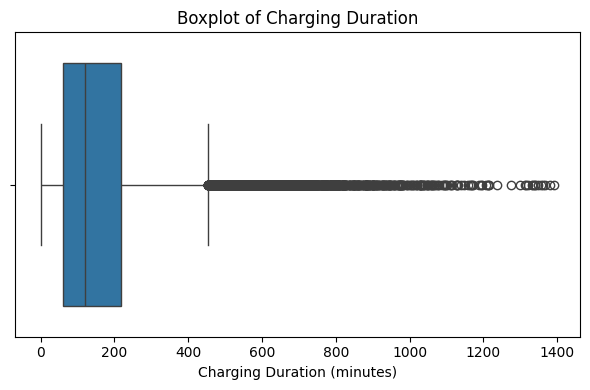

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['charging_duration_minutes'])
plt.xlabel('Charging Duration (minutes)')
plt.title('Boxplot of Charging Duration')
plt.tight_layout()
plt.show()

In [28]:
lower_percentile_25 = df['charging_duration_minutes'].quantile(0.25)
upper_percentile_75 = df['charging_duration_minutes'].quantile(0.75)

print(lower_percentile_25)
print(upper_percentile_75)

62.03
218.43


In [29]:
iqr = upper_percentile_75 - lower_percentile_25

upper_limit = upper_percentile_75 + 1.5*iqr
lower_limit = lower_percentile_25 - 1.5*iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 453.03000000000003
Lower limit -172.57000000000002


In [30]:
df[df['charging_duration_minutes']>upper_limit]

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh
42,-75.6823,45.43930,bc4ec5ab-6398-4335-b8ea-48e94f036d00,2022-05-05 19:23:13,2022-05-06 07:23:19,720.10,ON,City of Ottawa,245 crichton st.,AAA-14515,Charging ended by vehicle,61.13113
51,-75.6903,45.42081,1702dbf7-29ad-496b-b48b-a15c56b2411b,2022-05-06 20:38:53,2022-05-07 08:43:07,724.23,ON,City of Ottawa,110 laurier ave. w,AAB-15265,Charging ended by vehicle,50.82504
86,-75.4880,45.42515,e0ece4e3-340b-4e28-88da-a155a4eb14dd,2022-05-08 20:25:37,2022-05-09 12:13:51,948.23,ON,City of Ottawa,2925 navan rd.,AAB-20476,Charging ended by vehicle,30.56974
120,-75.5631,45.43034,92e5681f-cb95-4248-8baa-1c59f2cc68c8,2022-02-26 22:42:31,2022-02-27 10:46:45,724.23,ON,City of Ottawa,200 glen park dr.,AAB-18871,Charging ended by vehicle,69.24379
152,-75.6903,45.42081,343c828a-6595-430b-8a0a-348e9c41ca7c,2022-03-12 08:31:17,2022-03-12 17:56:09,564.87,ON,City of Ottawa,110 laurier ave. w,AAB-15265,The charging cable was disconnected and put ba...,63.81759
...,...,...,...,...,...,...,...,...,...,...,...,...
22448,-75.6903,45.42081,8d4ac393-d874-4a92-8c5f-263aa9657e17,2024-06-23 18:17:22,2024-06-24 02:41:03,503.68,ON,City of Ottawa,110 laurier ave. w,AAB-15265,The charging cable was disconnected and put ba...,57.49766
22450,-75.6623,45.40838,b68ff4eb-f956-419f-93e1-823b04de0b76,2024-06-23 21:38:59,2024-06-24 06:43:53,544.90,ON,City of Ottawa,1551 lycee place,AAA-14510,Charging ended by vehicle,36.09781
22451,-75.7136,45.41067,cb4c229b-458c-40a1-91f2-d1164c4c3963,2024-06-23 21:15:54,2024-06-24 07:57:41,641.78,ON,City of Ottawa,170 primrose ave.,AAA-14502,Charging ended by vehicle,61.54947
22453,-75.6782,45.08860,4ff71670-9a49-4ada-bcb7-204ab25f1b14,2024-06-23 22:05:14,2024-06-24 08:42:31,637.28,ON,City of Ottawa,186 main st.,AAA-14505,The charging cable was disconnected and put ba...,74.45688


In [31]:
overnight_threshold = upper_limit
domain_cap = 480 # 8 hours is considered as overnight charging in this domain (industry average)


df['end_reason'] = df['end_reason'].astype(str).str.strip().str.lower()

# Step 1: Flag overnight sessions
df['is_overnight_or_extended_charge'] = (
    (
        (df['charging_duration_minutes'] > overnight_threshold) &
        (df['connect_end'].dt.date > df['connect_start'].dt.date)
    )
    | 
    (   (df['charging_duration_minutes'] > overnight_threshold) &
        (df['end_reason'] == 'charging ended by vehicle')
    )
    |
    (   
      (df['charging_duration_minutes'] > overnight_threshold) &
      (
          (df['connect_start'].dt.hour >= 21) | (df['connect_end'].dt.hour < 7)
      )
    )
    |
    (
    (df['connect_start'].dt.hour >= 21) &
    (df['charging_duration_minutes'] >= 300) &  # 5 hours
    (df['charging_duration_minutes'] <= 480)    # 7 hours
    )
)

# Cap charging duration to reduce impact of extreme outliers
df.loc[:,'charging_duration_minutes'] = df['charging_duration_minutes'].clip(upper=domain_cap)

In [32]:
df[(df['is_overnight_or_extended_charge'] == True)]

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge
42,-75.6823,45.43930,bc4ec5ab-6398-4335-b8ea-48e94f036d00,2022-05-05 19:23:13,2022-05-06 07:23:19,480.0,ON,City of Ottawa,245 crichton st.,AAA-14515,charging ended by vehicle,61.13113,True
51,-75.6903,45.42081,1702dbf7-29ad-496b-b48b-a15c56b2411b,2022-05-06 20:38:53,2022-05-07 08:43:07,480.0,ON,City of Ottawa,110 laurier ave. w,AAB-15265,charging ended by vehicle,50.82504,True
86,-75.4880,45.42515,e0ece4e3-340b-4e28-88da-a155a4eb14dd,2022-05-08 20:25:37,2022-05-09 12:13:51,480.0,ON,City of Ottawa,2925 navan rd.,AAB-20476,charging ended by vehicle,30.56974,True
120,-75.5631,45.43034,92e5681f-cb95-4248-8baa-1c59f2cc68c8,2022-02-26 22:42:31,2022-02-27 10:46:45,480.0,ON,City of Ottawa,200 glen park dr.,AAB-18871,charging ended by vehicle,69.24379,True
153,-75.6903,45.42081,4a5e6a68-99f3-4f8a-9f18-f6f0d7644149,2022-03-12 20:45:14,2022-03-13 08:12:54,480.0,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,58.72802,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22448,-75.6903,45.42081,8d4ac393-d874-4a92-8c5f-263aa9657e17,2024-06-23 18:17:22,2024-06-24 02:41:03,480.0,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,57.49766,True
22450,-75.6623,45.40838,b68ff4eb-f956-419f-93e1-823b04de0b76,2024-06-23 21:38:59,2024-06-24 06:43:53,480.0,ON,City of Ottawa,1551 lycee place,AAA-14510,charging ended by vehicle,36.09781,True
22451,-75.7136,45.41067,cb4c229b-458c-40a1-91f2-d1164c4c3963,2024-06-23 21:15:54,2024-06-24 07:57:41,480.0,ON,City of Ottawa,170 primrose ave.,AAA-14502,charging ended by vehicle,61.54947,True
22453,-75.6782,45.08860,4ff71670-9a49-4ada-bcb7-204ab25f1b14,2024-06-23 22:05:14,2024-06-24 08:42:31,480.0,ON,City of Ottawa,186 main st.,AAA-14505,the charging cable was disconnected and put ba...,74.45688,True


In [33]:
df[(df['is_overnight_or_extended_charge'] == False) & (df['charging_duration_minutes'] > upper_limit)]

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge
152,-75.6903,45.42081,343c828a-6595-430b-8a0a-348e9c41ca7c,2022-03-12 08:31:17,2022-03-12 17:56:09,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,63.81759,False
429,-75.6903,45.42081,058c53cb-7a62-4b39-b1b0-4c26986551cf,2022-04-25 08:01:02,2022-04-25 17:37:31,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,56.13184,False
974,-75.6903,45.42081,0f1aaa56-82e0-4db0-b168-ca09c0dc3e93,2022-02-04 08:35:25,2022-02-04 16:46:01,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,56.51720,False
1192,-75.7212,45.40702,b6ea52c7-ef90-4f07-bd35-4350a109135b,2022-07-03 14:20:54,2022-07-03 22:03:02,462.13,ON,City of Ottawa,930 wellington st.,AAA-14501,the charging cable was disconnected and put ba...,51.21742,False
1307,-75.6864,45.41601,8060b793-2848-4ec4-9241-2489e9a362be,2022-05-28 09:40:15,2022-05-28 17:13:28,453.22,ON,City of Ottawa,118 cartier st.,AAA-14504,the charging cable was disconnected and put ba...,53.40685,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21938,-75.6864,45.41601,834c7208-4650-4cda-a980-41ee2d6b715e,2024-06-04 13:03:45,2024-06-04 21:11:52,480.00,ON,City of Ottawa,118 cartier st.,AAA-14504,the charging cable was disconnected and put ba...,32.63672,False
22009,-75.6853,45.42702,313af419-9498-4ea6-a700-dca85d38ab69,2024-06-26 07:56:18,2024-06-26 16:54:20,480.00,ON,City of Ottawa,122 daly ave.,AAA-14516,the charging cable was disconnected and put ba...,63.29681,False
22200,-75.6864,45.41601,3215f20c-9308-420b-9b07-ed98b37bbdb0,2024-06-24 10:04:52,2024-06-24 20:30:54,480.00,ON,City of Ottawa,118 cartier st.,AAA-14504,the charging cable was disconnected and put ba...,43.40801,False
22288,-75.6623,45.40838,329c6e3b-2e9f-40e1-8cb2-d08ccb1cfba8,2024-06-22 01:52:22,2024-06-22 12:53:56,480.00,ON,City of Ottawa,1551 lycee place,AAA-14509,the charging cable was disconnected and put ba...,50.22434,False


In [34]:
df[(df['is_overnight_or_extended_charge'] == True) & (df['charging_duration_minutes'] < 480)]

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge
251,-75.6782,45.08860,45eff46a-7625-43f6-b7ce-78c4988319fc,2022-05-20 23:35:03,2022-05-21 07:27:36,472.55,ON,City of Ottawa,186 main st.,AAA-14505,the charging cable was disconnected and put ba...,56.36649,True
573,-75.7136,45.41067,01d815bd-0819-4b74-a59a-fcf4110ae8ae,2022-05-24 21:58:19,2022-05-25 05:45:34,467.25,ON,City of Ottawa,170 primrose ave.,AAA-14502,charging ended by vehicle,55.10844,True
774,-75.7212,45.40702,a1586e54-6884-4163-92b2-f37098e57060,2022-04-20 22:37:36,2022-04-21 04:56:00,378.40,ON,City of Ottawa,930 wellington st.,AAA-14498,charging ended by vehicle,32.41628,True
975,-75.5631,45.43034,432b4189-8654-403d-8722-ef31128c4a53,2022-02-04 09:12:59,2022-02-04 16:53:16,460.28,ON,City of Ottawa,200 glen park dr.,AAB-18871,charging ended by vehicle,46.83091,True
981,-75.5631,45.43034,e9a12fcd-26df-4304-8bd0-04e4592d5a05,2022-02-07 08:55:02,2022-02-07 16:29:07,454.08,ON,City of Ottawa,200 glen park dr.,AAB-18871,charging ended by vehicle,46.11384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,-75.5631,45.43034,42c79527-6f22-4aa4-a631-78e67f85683f,2024-06-25 03:22:25,2024-06-25 11:11:40,469.25,ON,City of Ottawa,200 glen park dr.,AAB-19054,charging ended by vehicle,7.54432,True
22247,-75.7136,45.41067,6c23191c-3739-4eb0-876c-5080dbd507bc,2024-06-25 21:55:24,2024-06-26 03:18:53,323.48,ON,City of Ottawa,170 primrose ave.,AAA-14502,charging ended by vehicle,35.03665,True
22248,-75.6864,45.41601,c3c4f563-00e3-4704-9786-63bf82348fdd,2024-06-25 21:21:19,2024-06-26 04:21:19,420.00,ON,City of Ottawa,118 cartier st.,AAA-14504,the charging cable was disconnected and put ba...,41.50283,True
22340,-75.7136,45.41067,63fea6f8-1e1a-4f1c-8a87-8e98554e44d8,2024-06-29 23:23:11,2024-06-30 07:10:01,466.83,ON,City of Ottawa,170 primrose ave.,AAA-14502,charging ended by vehicle,50.31904,True


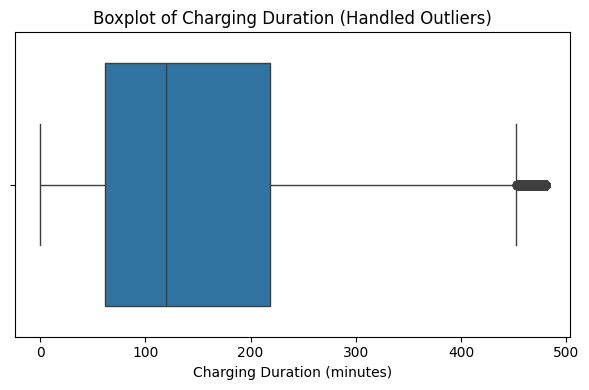

In [35]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['charging_duration_minutes'])
plt.xlabel('Charging Duration (minutes)')
plt.title('Boxplot of Charging Duration (Handled Outliers)')
plt.tight_layout()
plt.show()

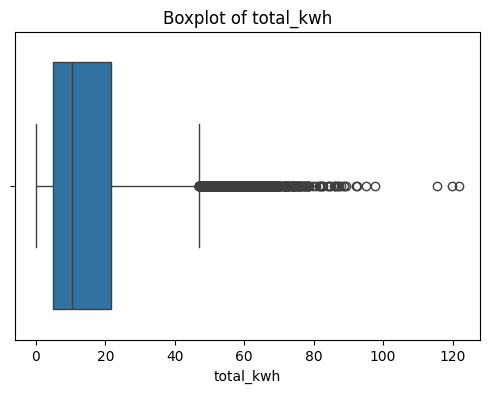

In [36]:
cols_to_plot = ['total_kwh']

for cols in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=df[cols])
    plt.title(f'Boxplot of {cols}')
    plt.show()

In [37]:
lower_percentile_25_kwh = df['total_kwh'].quantile(0.25)
upper_percentile_75_kwh = df['total_kwh'].quantile(0.75)

print(lower_percentile_25_kwh)
print(upper_percentile_75_kwh)

4.87317
21.65445


In [38]:
iqr = upper_percentile_75_kwh - lower_percentile_25_kwh

upper_limit_kwh = upper_percentile_75_kwh + 1.5*iqr
lower_limit_kwh = lower_percentile_25_kwh - 1.5*iqr

print("Upper limit",upper_limit_kwh)
print("Lower limit",lower_limit_kwh)

Upper limit 46.826370000000004
Lower limit -20.298750000000005


In [39]:
df[(df['total_kwh'] > upper_limit_kwh)]

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge
42,-75.6823,45.43930,bc4ec5ab-6398-4335-b8ea-48e94f036d00,2022-05-05 19:23:13,2022-05-06 07:23:19,480.00,ON,City of Ottawa,245 crichton st.,AAA-14515,charging ended by vehicle,61.13113,True
51,-75.6903,45.42081,1702dbf7-29ad-496b-b48b-a15c56b2411b,2022-05-06 20:38:53,2022-05-07 08:43:07,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,charging ended by vehicle,50.82504,True
120,-75.5631,45.43034,92e5681f-cb95-4248-8baa-1c59f2cc68c8,2022-02-26 22:42:31,2022-02-27 10:46:45,480.00,ON,City of Ottawa,200 glen park dr.,AAB-18871,charging ended by vehicle,69.24379,True
152,-75.6903,45.42081,343c828a-6595-430b-8a0a-348e9c41ca7c,2022-03-12 08:31:17,2022-03-12 17:56:09,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,63.81759,False
153,-75.6903,45.42081,4a5e6a68-99f3-4f8a-9f18-f6f0d7644149,2022-03-12 20:45:14,2022-03-13 08:12:54,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,58.72802,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22401,-75.6853,45.42702,e535033f-b015-4de5-a123-1a6d5e469b33,2024-06-23 08:25:49,2024-06-23 15:08:29,402.67,ON,City of Ottawa,122 daly ave.,AAA-14519,charging ended by vehicle,46.85983,False
22448,-75.6903,45.42081,8d4ac393-d874-4a92-8c5f-263aa9657e17,2024-06-23 18:17:22,2024-06-24 02:41:03,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,57.49766,True
22451,-75.7136,45.41067,cb4c229b-458c-40a1-91f2-d1164c4c3963,2024-06-23 21:15:54,2024-06-24 07:57:41,480.00,ON,City of Ottawa,170 primrose ave.,AAA-14502,charging ended by vehicle,61.54947,True
22453,-75.6782,45.08860,4ff71670-9a49-4ada-bcb7-204ab25f1b14,2024-06-23 22:05:14,2024-06-24 08:42:31,480.00,ON,City of Ottawa,186 main st.,AAA-14505,the charging cable was disconnected and put ba...,74.45688,True


In [40]:
df[(df['total_kwh'] > upper_limit_kwh) & (df['is_overnight_or_extended_charge'] == True)]

# 67% of rows where total kwh was greater than upper limit are overnight charging cases.
# Hence, leave these values as it is.

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge
42,-75.6823,45.43930,bc4ec5ab-6398-4335-b8ea-48e94f036d00,2022-05-05 19:23:13,2022-05-06 07:23:19,480.0,ON,City of Ottawa,245 crichton st.,AAA-14515,charging ended by vehicle,61.13113,True
51,-75.6903,45.42081,1702dbf7-29ad-496b-b48b-a15c56b2411b,2022-05-06 20:38:53,2022-05-07 08:43:07,480.0,ON,City of Ottawa,110 laurier ave. w,AAB-15265,charging ended by vehicle,50.82504,True
120,-75.5631,45.43034,92e5681f-cb95-4248-8baa-1c59f2cc68c8,2022-02-26 22:42:31,2022-02-27 10:46:45,480.0,ON,City of Ottawa,200 glen park dr.,AAB-18871,charging ended by vehicle,69.24379,True
153,-75.6903,45.42081,4a5e6a68-99f3-4f8a-9f18-f6f0d7644149,2022-03-12 20:45:14,2022-03-13 08:12:54,480.0,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,58.72802,True
158,-75.5631,45.43034,3947a5bd-b58c-4018-88a8-65524a6fd9bb,2022-03-14 20:18:02,2022-03-15 08:11:04,480.0,ON,City of Ottawa,200 glen park dr.,AAB-18871,charging ended by vehicle,59.99546,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22399,-75.4880,45.42515,000e31af-3bd5-4eb4-a087-3e5e0b52568d,2024-06-22 16:14:00,2024-06-23 14:56:04,480.0,ON,City of Ottawa,2925 navan rd.,AAB-20388,charging ended by vehicle,58.32147,True
22448,-75.6903,45.42081,8d4ac393-d874-4a92-8c5f-263aa9657e17,2024-06-23 18:17:22,2024-06-24 02:41:03,480.0,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,57.49766,True
22451,-75.7136,45.41067,cb4c229b-458c-40a1-91f2-d1164c4c3963,2024-06-23 21:15:54,2024-06-24 07:57:41,480.0,ON,City of Ottawa,170 primrose ave.,AAA-14502,charging ended by vehicle,61.54947,True
22453,-75.6782,45.08860,4ff71670-9a49-4ada-bcb7-204ab25f1b14,2024-06-23 22:05:14,2024-06-24 08:42:31,480.0,ON,City of Ottawa,186 main st.,AAA-14505,the charging cable was disconnected and put ba...,74.45688,True


In [41]:
# Winsorize only those values of total_kwh which do not come under overnight charging and are greater than upper limit of total kwh

df[(df['total_kwh'] > upper_limit_kwh) & (df['is_overnight_or_extended_charge'] == False)]

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge
152,-75.6903,45.42081,343c828a-6595-430b-8a0a-348e9c41ca7c,2022-03-12 08:31:17,2022-03-12 17:56:09,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,63.81759,False
429,-75.6903,45.42081,058c53cb-7a62-4b39-b1b0-4c26986551cf,2022-04-25 08:01:02,2022-04-25 17:37:31,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,56.13184,False
706,-75.7212,45.40702,739f17cf-d47f-4019-8536-68a15457a2ee,2022-04-15 01:44:17,2022-04-15 08:28:23,404.10,ON,City of Ottawa,930 wellington st.,AAA-14501,charging ended by vehicle,47.59556,False
961,-75.6903,45.42081,c1f4b20e-169f-4141-b74a-b7ee2ba16fc2,2022-01-28 17:29:28,2022-01-29 00:54:57,445.48,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,51.94587,False
974,-75.6903,45.42081,0f1aaa56-82e0-4db0-b168-ca09c0dc3e93,2022-02-04 08:35:25,2022-02-04 16:46:01,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,56.51720,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22296,-75.6793,45.42710,ea79020e-11fb-4a9d-9a2f-1f2822cbcd91,2024-06-29 10:41:16,2024-06-29 17:52:11,430.92,ON,City of Ottawa,301 laurier ave. e,AAA-14507,the charging cable was disconnected and put ba...,50.88044,False
22306,-75.4880,45.42515,2101512a-7319-4578-8f3a-19ce2a74d598,2024-06-29 02:51:51,2024-06-29 18:52:21,480.00,ON,City of Ottawa,2925 navan rd.,AAB-20388,the charging cable was disconnected and put ba...,49.86600,False
22334,-75.6823,45.43930,e7146452-d71a-4c0c-88e1-96cb6b481553,2024-06-29 18:36:09,2024-06-30 01:05:19,389.17,ON,City of Ottawa,245 crichton st.,AAA-14506,charging ended by vehicle,47.49926,False
22398,-75.7475,45.39468,6fdd5d8c-00b9-4b75-9cbe-0d742434e16b,2024-06-30 09:50:19,2024-06-30 16:52:15,421.93,ON,City of Ottawa,190 richmond rd.,AAA-14533,the charging cable was disconnected and put ba...,47.60228,False


In [42]:
df.loc[(df['total_kwh'] > upper_limit_kwh) & (df['is_overnight_or_extended_charge'] == False), 'total_kwh'] = upper_limit_kwh

In [43]:
df[(df['total_kwh'] == upper_limit_kwh) & (df['is_overnight_or_extended_charge'] == False)]

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge
152,-75.6903,45.42081,343c828a-6595-430b-8a0a-348e9c41ca7c,2022-03-12 08:31:17,2022-03-12 17:56:09,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,46.82637,False
429,-75.6903,45.42081,058c53cb-7a62-4b39-b1b0-4c26986551cf,2022-04-25 08:01:02,2022-04-25 17:37:31,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,46.82637,False
706,-75.7212,45.40702,739f17cf-d47f-4019-8536-68a15457a2ee,2022-04-15 01:44:17,2022-04-15 08:28:23,404.10,ON,City of Ottawa,930 wellington st.,AAA-14501,charging ended by vehicle,46.82637,False
961,-75.6903,45.42081,c1f4b20e-169f-4141-b74a-b7ee2ba16fc2,2022-01-28 17:29:28,2022-01-29 00:54:57,445.48,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,46.82637,False
974,-75.6903,45.42081,0f1aaa56-82e0-4db0-b168-ca09c0dc3e93,2022-02-04 08:35:25,2022-02-04 16:46:01,480.00,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,46.82637,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22296,-75.6793,45.42710,ea79020e-11fb-4a9d-9a2f-1f2822cbcd91,2024-06-29 10:41:16,2024-06-29 17:52:11,430.92,ON,City of Ottawa,301 laurier ave. e,AAA-14507,the charging cable was disconnected and put ba...,46.82637,False
22306,-75.4880,45.42515,2101512a-7319-4578-8f3a-19ce2a74d598,2024-06-29 02:51:51,2024-06-29 18:52:21,480.00,ON,City of Ottawa,2925 navan rd.,AAB-20388,the charging cable was disconnected and put ba...,46.82637,False
22334,-75.6823,45.43930,e7146452-d71a-4c0c-88e1-96cb6b481553,2024-06-29 18:36:09,2024-06-30 01:05:19,389.17,ON,City of Ottawa,245 crichton st.,AAA-14506,charging ended by vehicle,46.82637,False
22398,-75.7475,45.39468,6fdd5d8c-00b9-4b75-9cbe-0d742434e16b,2024-06-30 09:50:19,2024-06-30 16:52:15,421.93,ON,City of Ottawa,190 richmond rd.,AAA-14533,the charging cable was disconnected and put ba...,46.82637,False


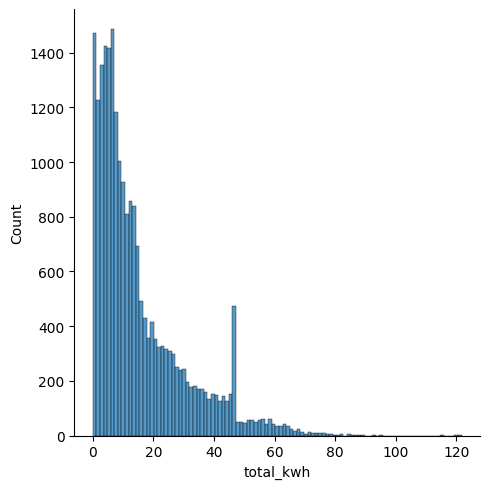

In [44]:
sns.displot(df['total_kwh'])

In [45]:
df.columns

Index(['longitude', 'latitude', 'session_id', 'connect_start', 'connect_end',
       'charging_duration_minutes', 'province', 'owner', 'address',
       'station_id', 'end_reason', 'total_kwh',
       'is_overnight_or_extended_charge'],
      dtype='object')

In [46]:
df.to_csv('/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/EV-Project/data/cleaned_ev_dataset.csv', index=False)

In [47]:
from ydata_profiling import ProfileReport
prof= ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 20.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]